In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit
from pprint import pprint

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood(A,f_b,alpha_H,poisson):
    alpha_L = 1.0
    
    perdata09 = pd.read_csv("perlist09.csv")
    f = perdata09['f']
    per = perdata09['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata09)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
m=Minuit(twi_minus_loglikelihood,A=0.01,f_b=1.7E-4,alpha_H=3.8,poisson=0.8,
         error_A=0.0001,error_f_b=1.0E-5,error_alpha_H=0.01,error_poisson=0.01,
         limit_A=(0.001,0.1), limit_f_b=(1.0E-5,1.0E-3),limit_alpha_H=(1.5,5.0),limit_poisson=(0,2),
         errordef=1)

In [4]:
m.migrad()

6589.405261332732
6589.380070991928
6589.43048156216
6589.154699262401
6589.658812280749
6589.184985375001
6589.627812805046
6589.429525352852
6589.380992098977
6589.647667351929
6589.16233394595
6587.8544106124755
6590.958329424905
6589.16233394595
6588.185357356341
6585.705065586186
6577.911561263043
6550.281267308375
6372.675508390794
6158.709304333414
6158.325528645608
6159.098683218689
6158.430886924971
6158.990658916264
6158.537805196862
6158.881416041223
6158.33456581117
6159.0869800472465
6156.19963167701
6161.2433386111115
6157.835093711359
6159.586452270223
6157.898517368445
6159.521513479437
6157.544566660838
6159.876979184633
6018.094575780129
5977.199202002319
5980.8403072104875
5979.058328759115
5976.19167074552
5976.735359895247
5975.650783248645
5976.513505565604
5975.869918905432
5978.078846196804
5974.3073504367485
5976.209611556879
5976.173903712276
5976.265276144651
5976.120917343043
5975.953908872568
5976.430510168007
5975.805533805477
5976.580657833544
5876.569654

FCN = 5641.439988140584 
 TOTAL NCALL = 270 
 NCALLS = 270 
 
 
 EDM = 8.410413883452782e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.0695488,0.0747875,,,0.001,0.1,No
1,f_b,2.28082e-05,1.54122e-05,,,1e-05,0.001,No
2,alpha_H,2.57394,0.199898,,,1.5,5,No
3,poisson,1.53533,0.0386932,,,0,2,No


({'fval': 5641.439988140584,
  'edm': 8.410413883452782e-05,
  'nfcn': 270,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'A',
   'value': 0.06954884024494411,
   'error': 0.07478748206182623,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 0.001,
   'upper_limit': 0.1},
  {'number': 1,
   'name': 'f_b',
   'value': 2.2808235790873164e-05,
   'error': 1.541219219924951e-05,
   'is_const': False,
   'is_fixed': False,
   'has_limits': True,
   'has_lower_limit': True,
   'has_upper_limit': True,
   'lower_limit': 1e-05,
   'upper_limit': 0.001},
  {'number': 2,
   'name': 'alpha_H',
   'value': 2.573940897458308,
   'error': 0.19989840322937602,


In [5]:
pprint(m.fval)
m.print_param()

5641.439988140584


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,A,0.0695488,0.0747875,,,0.001,0.1,No
1,f_b,2.28082e-05,1.54122e-05,,,1e-05,0.001,No
2,alpha_H,2.57394,0.199898,,,1.5,5,No
3,poisson,1.53533,0.0386932,,,0,2,No


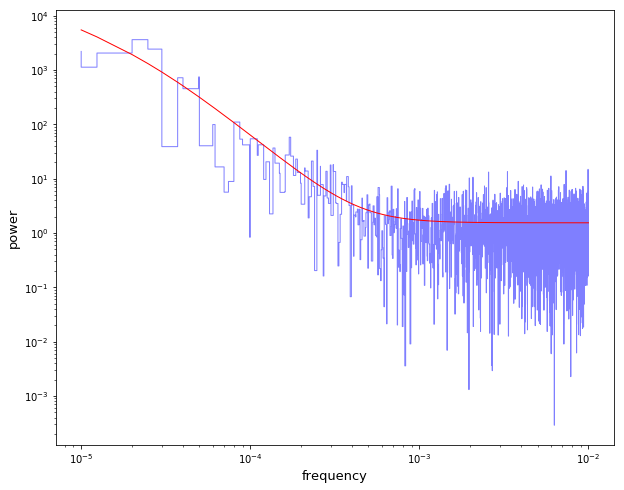

In [6]:
perdata09 = pd.read_csv("perlist09.csv")
f = perdata09['f']
per = perdata09['per']

alpha_L = 1.0
A,f_b,alpha_H,poisson = m.values[0],m.values[1],m.values[2],m.values[3]

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()